In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [148]:
df = pd.read_csv(r"C:\Users\Fahad\Desktop\my works\MathCrypters\Source\dataset\city_day.csv")

df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
df = df.dropna(subset=['AQI'])

df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [149]:
df = df[~((df['City'] == 'Ahmedabad') & (df['AQI'] > 500))]


In [150]:
city_features = df.groupby('City').agg(
    mean_aqi=('AQI', 'mean'),
    std_aqi=('AQI', 'std'),
    max_aqi=('AQI', 'max'),
    severe_days=('AQI', lambda x: (x > 200).mean())
).reset_index()

city_features


,City,mean_aqi,std_aqi,max_aqi,severe_days
0,Ahmedabad,291.719089,119.736665,500.0,0.737527
1,Aizawl,34.765766,19.969957,92.0,0.000000
2,Amaravati,95.299643,56.061409,312.0,0.065398
3,Amritsar,119.920959,76.967676,869.0,0.107460
4,Bengaluru,94.318325,39.914934,352.0,0.021466
5,Bhopal,132.827338,56.000829,312.0,0.125899
6,Brajrajnagar,150.280505,70.370248,355.0,0.218794
7,Chandigarh,96.498328,57.180826,335.0,0.076923
8,Chennai,114.502654,51.967099,449.0,0.067410
9,Coimbatore,73.023256,18.063850,120.0,0.000000


In [151]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


In [152]:
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]


In [153]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, c) for c in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)


In [154]:
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) == 0:
            new_centroids.append(X[np.random.randint(0, len(X))])
        else:
            new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)


In [155]:
def kmeans_manual(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return clusters, centroids


In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(
    city_features[['mean_aqi', 'std_aqi', 'max_aqi', 'severe_days']]
)


In [157]:
k = 6
clusters, centroids = kmeans_manual(X, k)

city_features['Cluster'] = clusters
city_features


,City,mean_aqi,std_aqi,max_aqi,severe_days,Cluster
0,Ahmedabad,291.719089,119.736665,500.0,0.737527,5
1,Aizawl,34.765766,19.969957,92.0,0.000000,3
2,Amaravati,95.299643,56.061409,312.0,0.065398,1
3,Amritsar,119.920959,76.967676,869.0,0.107460,2
4,Bengaluru,94.318325,39.914934,352.0,0.021466,1
5,Bhopal,132.827338,56.000829,312.0,0.125899,4
6,Brajrajnagar,150.280505,70.370248,355.0,0.218794,4
7,Chandigarh,96.498328,57.180826,335.0,0.076923,1
8,Chennai,114.502654,51.967099,449.0,0.067410,4
9,Coimbatore,73.023256,18.063850,120.0,0.000000,3


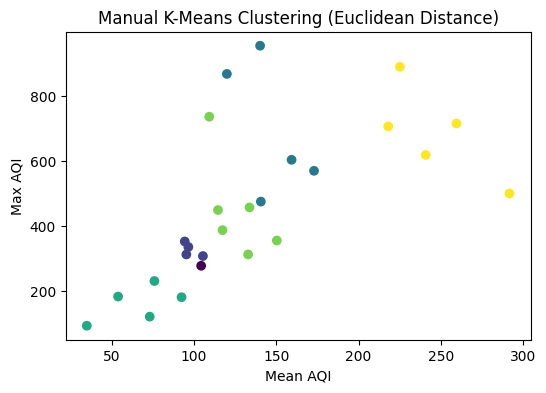

In [158]:
plt.figure(figsize=(6,4))
plt.scatter(
    city_features['mean_aqi'],
    city_features['max_aqi'],
    c=city_features['Cluster']
)
plt.xlabel("Mean AQI")
plt.ylabel("Max AQI")
plt.title("Manual K-Means Clustering (Euclidean Distance)")
plt.show()


In [159]:
def aqi_category(mean_aqi):
    if mean_aqi <= 50:
        return "Good"
    elif mean_aqi <= 100:
        return "Satisfactory"
    elif mean_aqi <= 200:
        return "Moderate"
    elif mean_aqi <= 300:
        return "Poor"
    else:
        return "Very Poor"


In [160]:
city_features['AQI_Category'] = city_features['mean_aqi'].apply(aqi_category)


In [161]:
category_colors = {
    "Good": "green",
    "Satisfactory": "yellow",
    "Moderate": "orange",
    "Poor": "red",
    "Very Poor": "purple"
}


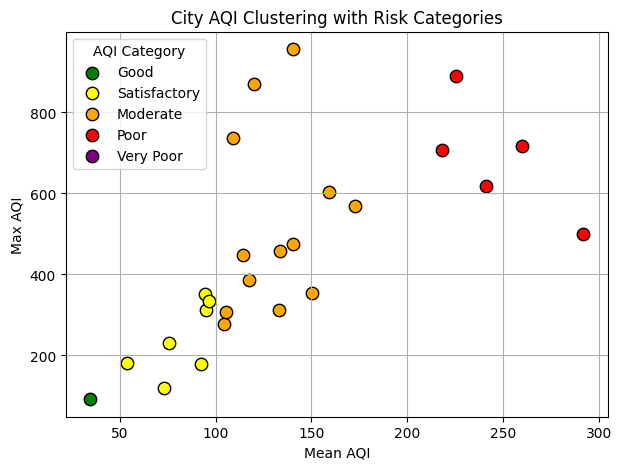

In [162]:
plt.figure(figsize=(7,5))

for category, color in category_colors.items():
    subset = city_features[city_features['AQI_Category'] == category]
    plt.scatter(
        subset['mean_aqi'],
        subset['max_aqi'],
        c=color,
        label=category,
        edgecolors='black',
        s=80
    )

plt.xlabel("Mean AQI")
plt.ylabel("Max AQI")
plt.title("City AQI Clustering with Risk Categories")
plt.legend(title="AQI Category")
plt.grid(True)
plt.show()


In [163]:
# Ensure City column is clean
city_features["City"] = city_features["City"].astype(str).str.strip()

# Handle common aliases
city_aliases = {
    "Bangalore": "Bengaluru",
    "Trivandrum": "Thiruvananthapuram",
    "Gurgaon": "Gurugram",
    "Cochin": "Kochi"
}

city_features["City"] = city_features["City"].replace(city_aliases)

print("Unique cities after normalization:")
print(sorted(city_features["City"].unique()))

Unique cities after normalization:
['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


In [164]:
city_coords = {
    "Ahmedabad": (23.0225, 72.5714),
    "Aizawl": (23.7271, 92.7176),
    "Amaravati": (16.5417, 80.5150),
    "Amritsar": (31.6340, 74.8723),
    "Bengaluru": (12.9716, 77.5946),
    "Bhopal": (23.2599, 77.4126),
    "Brajrajnagar": (21.8200, 83.9200),
    "Chandigarh": (30.7333, 76.7794),
    "Chennai": (13.0827, 80.2707),
    "Coimbatore": (11.0168, 76.9558),
    "Delhi": (28.6139, 77.2090),
    "Ernakulam": (9.9816, 76.2999),
    "Gurugram": (28.4595, 77.0266),
    "Guwahati": (26.1445, 91.7362),
    "Hyderabad": (17.3850, 78.4867),
    "Jaipur": (26.9124, 75.7873),
    "Jorapokhar": (23.7000, 86.4000),
    "Kochi": (9.9312, 76.2673),
    "Kolkata": (22.5726, 88.3639),
    "Lucknow": (26.8467, 80.9462),
    "Mumbai": (19.0760, 72.8777),
    "Patna": (25.5941, 85.1376),
    "Shillong": (25.5788, 91.8933),
    "Talcher": (20.9500, 85.2300),
    "Thiruvananthapuram": (8.5241, 76.9366),
    "Visakhapatnam": (17.6868, 83.2185)
}

In [165]:
city_features["lat"] = city_features["City"].map(
    lambda c: city_coords.get(c, (None, None))[0]
)

city_features["lon"] = city_features["City"].map(
    lambda c: city_coords.get(c, (None, None))[1]
)

# Check missing mappings
missing = city_features[city_features["lat"].isna()]["City"].unique()
print("Cities without coordinates:", missing)

# Drop rows with missing coordinates
city_features = city_features.dropna(subset=["lat", "lon"])

Cities without coordinates: []


In [166]:
# Inspect cluster AQI behavior
cluster_means = (
    city_features
    .groupby("Cluster")["mean_aqi"]
    .mean()
    .sort_values()
)

print(cluster_means)

Cluster
3     65.964390
1     97.867138
0    104.284810
4    126.294493
2    146.547365
5    247.017163
Name: mean_aqi, dtype: float64


In [167]:
cluster_to_label = {
    0: "Good",
    1: "Satisfactory",
    2: "Moderate",
    3: "Poor",
    4: "Very Poor",
    5: "Severe"
}

city_features["label"] = city_features["Cluster"].map(cluster_to_label)

In [168]:
import json


output = city_features[[
    "City", "lat", "lon", "mean_aqi", "AQI_Category"
]].to_dict(orient="records")

with open("city_clusters.json", "w") as f:
    json.dump(output, f, indent=2)


